# Hotel reservation cancellation prediction

The customer of this study is the hotel chain.

To attract customers, this hotel has added the ability to book a room without prepayment on its website. However, if the client canceled the booking, then the company suffered losses. Hotel staff could, for example, buy groceries for the guest's arrival, or simply not have time to find another client.

To solve this problem, you need to develop a system that predicts cancelling. If the model shows that the booking will be cancelled, then the client is asked to make a deposit. The deposit is 80% of the cost of the room for one day and the cost of one-time cleaning. The money will be debited from the client's account if he still cancels the reservation.

## Data Load and EDA

In [1]:
# data analysis and wrangling
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

import sweetviz as sv

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv('hotel_train.csv')
test_data = pd.read_csv('hotel_test.csv')

In [3]:
train_data.head(5)

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,July,27,1,0,1,1.0,...,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,July,27,1,0,2,2.0,...,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.0,2015,July,27,1,0,3,2.0,...,0,0,0,A,0,0,Transient,0,1,3


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                            

In [6]:
combine = [train_data, test_data]

**Define categorical and numerical properties**

In [7]:
print(train_data.columns.values)

['id' 'is_canceled' 'lead_time' 'arrival_date_year' 'arrival_date_month'
 'arrival_date_week_number' 'arrival_date_day_of_month'
 'stays_in_weekend_nights' 'stays_in_week_nights' 'adults' 'children'
 'babies' 'meal' 'country' 'distribution_channel' 'is_repeated_guest'
 'previous_cancellations' 'previous_bookings_not_canceled'
 'reserved_room_type' 'booking_changes' 'days_in_waiting_list'
 'customer_type' 'required_car_parking_spaces' 'total_of_special_requests'
 'total_nights']


1. Categorical - 'is_canceled', 'customer_type', 'is_repeated_guest', 'meal', 'required_car_parking_spaces', 'reserved_room_type', 'distribution_channel', 'arrival_date_year', 'arrival_date_month', 'required_car_parking_spaces'
2. Numerical - 'adults', 'children', 'babies',  'total_of_special_requests', 'total_nights',
 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
'country', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes'



                                             |      | [  0%]   00:00 -> (? left)

AttributeError: module 'numpy' has no attribute 'warnings'

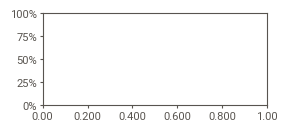

In [95]:
eda_report = sv.analyze([train_data, 'EDA_report'], target_feat='is_canceled')

In [8]:
eda_report.show_notebook(layout='vertical')

NameError: name 'eda_report' is not defined

1. 'id' - You can delete the column, since the value is individual for each user
2. 'is_canceled' - target property
3. 'lead_time' is a numeric variable, there is a correlation with the target property
4. 'arrival_date_year' - data for 2015 - 2016
5. 'arrival_date_month' - add a categorical property by time of year
6. 'arrival_date_week_number' - repeated information, delete the column
7. 'arrival_date_day_of_month' - repeated information, remove the column
8. 'stays_in_weekend_nights' - numerical discrete variable, no strong correlation with the target property
9. 'stays_in_week_nights' - numerical discrete variable, no strong correlation with the target property
10. 'adults' - numerical discrete variable, no strong correlation with the target property
11. 'children' - numerical discrete variable, no strong correlation with the target property
12. 'babies' - over 99% of guests don't have babies, remove this column
13. 'meal' - categorical variable
14. 'country' - string variable
15. 'distribution_channel' - categorical variable
16. 'is_repeated_guest' - more than 97% of the guests have not stayed at the hotel yet, we will delete this column, since this information is in other columns (17,18)
17. 'previous_cancellations' - over 91% of guests no cancellation, unbalanced class
18. 'previous_bookings_not_canceled' - more than 98% have no confirmed bookings, unbalanced class
19. 'reserved_room_type' - categorical variable
20. 'booking_changes' - numerical discrete variable, no strong correlation with the target property
21. 'days_in_waiting_list' - numerical discrete variable, no strong correlation with the target property
22. 'customer_type' - categorical variable
23. 'required_car_parking_spaces' - categorical variable
24. 'total_of_special_requests' - numerical discrete variable, no strong correlation with the target property
25. 'total_nights' numerical discrete variable

**Delete unnecessary columns**

In [9]:
columns_to_drop = ['id', 
                   'arrival_date_year', 
                   'arrival_date_week_number', 
                   'arrival_date_day_of_month', 
                   'is_repeated_guest']
train_data = train_data.drop(columns_to_drop, axis=1)
test_data = test_data.drop(columns_to_drop, axis=1)
combine = [train_data, test_data]

In [10]:
test_data.shape, train_data.shape

((32412, 20), (65229, 20))

**Duplicates**

In [11]:
train_data.duplicated().sum()

22175

In [12]:
train_data = train_data.drop_duplicates()
train_data.shape

(43054, 20)

**Outliars**

count    42141.000000
mean         0.010584
std          0.103025
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: babies, dtype: float64

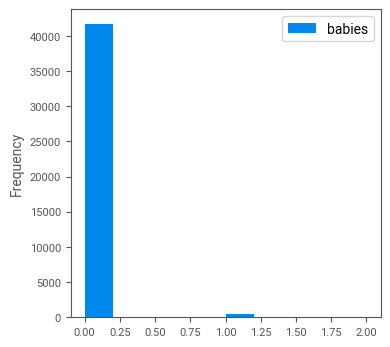

In [109]:
train_data.plot(y='babies', kind='hist', figsize=(4, 4))

train_data.babies.describe()

In [14]:
train_data.loc[train_data['babies'] > 2, ['babies']] = 1

Found outliers with a large number of babies, apparently this is a typo, replaced by 1

count    42141.000000
mean         0.420541
std          5.095861
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         99.000000
Name: days_in_waiting_list, dtype: float64

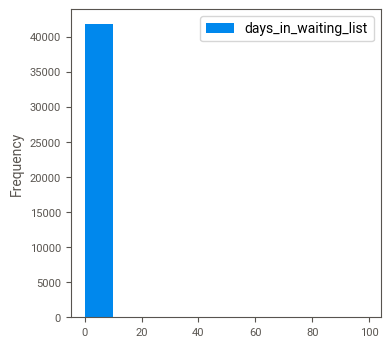

In [110]:
train_data.plot(y='days_in_waiting_list', kind='hist', figsize=(4, 4))
train_data.days_in_waiting_list.describe()

In [16]:
train_data = train_data[train_data['days_in_waiting_list'] <= 100]

Leave only those lines where the values of 'days_in_waiting_list' are less than 100

count    42141.000000
mean         0.026221
std          0.175912
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: previous_cancellations, dtype: float64

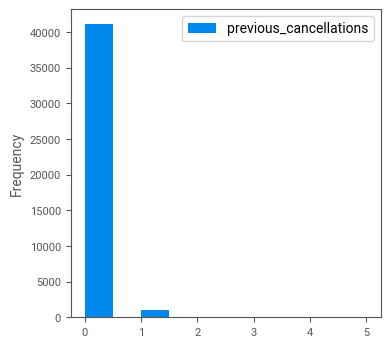

In [111]:
train_data.plot(y='previous_cancellations', kind='hist', figsize=(4, 4))
train_data.previous_cancellations.describe()

In [18]:
train_data = train_data[train_data['previous_cancellations'] <= 5]

Left only those guests who have less than 5 cancellations

count    42141.000000
mean         0.081821
std          0.600622
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: previous_bookings_not_canceled, dtype: float64

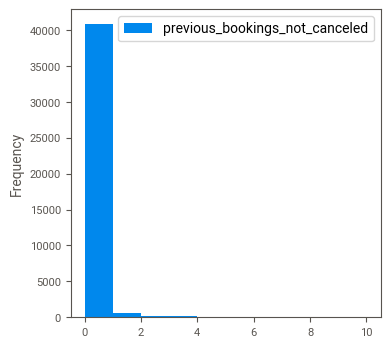

In [112]:
train_data.plot(y='previous_bookings_not_canceled', kind='hist', figsize=(4, 4))
train_data.previous_bookings_not_canceled.describe()

In [20]:
train_data = train_data[train_data['previous_bookings_not_canceled'] <= 10]


Left only those guests who have less than 10 visits

count    42141.000000
mean         0.241119
std          0.604739
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: booking_changes, dtype: float64

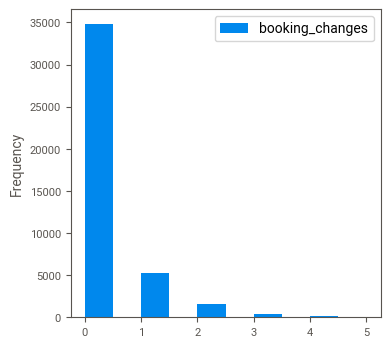

In [113]:
train_data.plot(y='booking_changes', kind='hist', figsize=(4, 4))
train_data.booking_changes.describe()

In [22]:
train_data = train_data[train_data['booking_changes'] <= 5]
train_data.booking_changes.describe()

count    42714.000000
mean         0.241349
std          0.605211
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: booking_changes, dtype: float64

Left only those guests who have less than 5 changes in the booking

In [23]:
combine = [train_data, test_data]

**Convert the month into a categorical value**

In [24]:
winter = ['December','January','February']
spring = ['March', 'April', 'May']
summer = ['June', 'July', 'August']

for data in combine:
    seasons = []
    for value in data['arrival_date_month']:
        if value in winter:
            seasons.append(0)
        elif value in spring:
            seasons.append(1)
        elif value in summer:
            seasons.append(2)
        else:
            seasons.append(3)
    data['season'] = seasons


In [25]:
train_data = train_data.drop('arrival_date_month', axis=1)
test_data = test_data.drop('arrival_date_month', axis=1)
combine = [train_data, test_data]

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42714 entries, 0 to 65228
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     42714 non-null  int64  
 1   lead_time                       42714 non-null  float64
 2   stays_in_weekend_nights         42714 non-null  int64  
 3   stays_in_week_nights            42714 non-null  int64  
 4   adults                          42714 non-null  float64
 5   children                        42714 non-null  float64
 6   babies                          42714 non-null  float64
 7   meal                            42714 non-null  object 
 8   country                         42714 non-null  object 
 9   distribution_channel            42714 non-null  object 
 10  previous_cancellations          42714 non-null  int64  
 11  previous_bookings_not_canceled  42714 non-null  int64  
 12  reserved_room_type              

**Convert categorical variables from strings to numbers**

In [27]:
train_data['distribution_channel'].value_counts()

TA/TO        34624
Direct        5509
Corporate     2491
GDS             90
Name: distribution_channel, dtype: int64

In [28]:
train_data['meal'].value_counts()


BB           34532
SC            4591
HB            3309
SC             149
FB             133
Name: meal, dtype: int64

In [29]:
col_one_list = train_data['meal'].unique().tolist()
col_one_list

['BB       ', 'FB       ', 'HB       ', 'SC       ', 'SC']

In [30]:
train_data['meal'] = train_data['meal'].str.strip()
test_data['meal'] = test_data['meal'].str.strip()
col_one_list = train_data['meal'].unique().tolist()
col_one_list

['BB', 'FB', 'HB', 'SC']

In [31]:
train_data['customer_type'].value_counts()

Transient          34411
Transient-Party     6178
Contract            1867
Group                258
Name: customer_type, dtype: int64

In [32]:
train_data['reserved_room_type'].value_counts()

A                   29423
D                    8355
E                    2220
F                    1170
B                     742
G                     579
C                     225
Name: reserved_room_type, dtype: int64

In [33]:
col_one_list = train_data['reserved_room_type'].unique().tolist()
col_one_list

['A               ',
 'C               ',
 'D               ',
 'E               ',
 'G               ',
 'F               ',
 'B               ']

In [34]:
train_data['reserved_room_type'] = train_data['reserved_room_type'].str.strip()
test_data['reserved_room_type'] = test_data['reserved_room_type'].str.strip()
col_one_list = train_data['reserved_room_type'].unique().tolist()
col_one_list

['A', 'C', 'D', 'E', 'G', 'F', 'B']

In [35]:
for data in combine:
    data['distribution_channel'] = data['distribution_channel'] \
        .map({'TA/TO': 0, 'Direct': 1, 'Corporate': 2, 'GDS': 3})
    data['meal'] = data['meal'] \
        .map({'BB': 0, 'HB': 1, 'SC': 2, 'FB': 3})
    data['customer_type'] = data['customer_type'] \
        .map({'Transient': 0, 'Transient-Party': 1, 'Contract': 2, 'Group': 3})
    data['reserved_room_type'] = data['reserved_room_type'] \
        .map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6})
train_data.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,season
0,0,7.0,0,1,1.0,0.0,0.0,0,GBR,1,0,0,0,0,0,0,0,0,1,2
1,0,14.0,0,2,2.0,0.0,0.0,0,GBR,0,0,0,0,0,0,0,0,1,2,2
2,0,0.0,0,2,2.0,0.0,0.0,0,PRT,1,0,0,2,0,0,0,0,0,2,2
3,0,9.0,0,2,2.0,0.0,0.0,3,PRT,1,0,0,2,0,0,0,0,1,2,2
4,1,85.0,0,3,2.0,0.0,0.0,0,PRT,0,0,0,0,0,0,0,0,1,3,2


**Checking the data for adequacy**

In [36]:
train_data[train_data['adults'] == 0]

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,season
17540,0,1.0,1,1,0.0,3.0,0.0,0,PRT,1,0,0,1,1,0,1,0,0,2,2
17598,0,104.0,0,3,0.0,2.0,0.0,0,FRA,0,0,0,1,1,0,1,0,2,3,2
17982,0,3.0,2,0,0.0,2.0,0.0,0,PRT,1,0,0,1,1,0,1,0,1,2,2
21556,1,48.0,1,3,0.0,2.0,0.0,0,PRT,0,0,0,1,0,0,1,0,1,4,3
22516,1,6.0,1,0,0.0,3.0,0.0,0,PRT,0,0,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64641,0,109.0,2,3,0.0,2.0,0.0,0,BRA,0,0,0,1,0,0,0,0,2,5,0
64882,0,104.0,2,1,0.0,2.0,0.0,0,PRT,0,0,0,1,1,0,0,0,2,3,0
64892,0,104.0,2,1,0.0,2.0,0.0,0,FRA,0,0,0,1,0,0,0,0,2,3,0
64903,0,247.0,2,3,0.0,2.0,0.0,0,PRT,0,0,0,1,0,0,0,0,1,5,0


In [37]:
train_data = train_data.drop(train_data[train_data['adults'] == 0].index)

In [38]:
train_data.shape

(42551, 20)

In [39]:
combine = [train_data, test_data]

**Проверим тестовый датасет на дубликаты**

In [40]:
test_data.duplicated().sum()

8096

In [41]:
test_data = test_data.drop_duplicates()
test_data.shape

(24316, 20)

In [42]:
combine = [train_data, test_data]

In [43]:
train_data.head(2)

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,season
0,0,7.0,0,1,1.0,0.0,0.0,0,GBR,1,0,0,0,0,0,0,0,0,1,2
1,0,14.0,0,2,2.0,0.0,0.0,0,GBR,0,0,0,0,0,0,0,0,1,2,2


**Cancellation Correlation with Country**

In [44]:
countries = train_data.pivot_table(index='country', values='is_canceled', aggfunc=['mean','count'])
countries.columns = ['mean', 'count']
countries = countries.sort_values(by='count', ascending=False)[:20]

In [45]:
countries

,mean,count
country,,
PRT,0.367823,13550
FRA,0.157517,4736
GBR,0.167060,4232
ESP,0.223316,3860
DEU,0.167524,2722
ITA,0.339031,1755
IRL,0.178250,1223
BEL,0.161626,1058
NLD,0.159449,1016


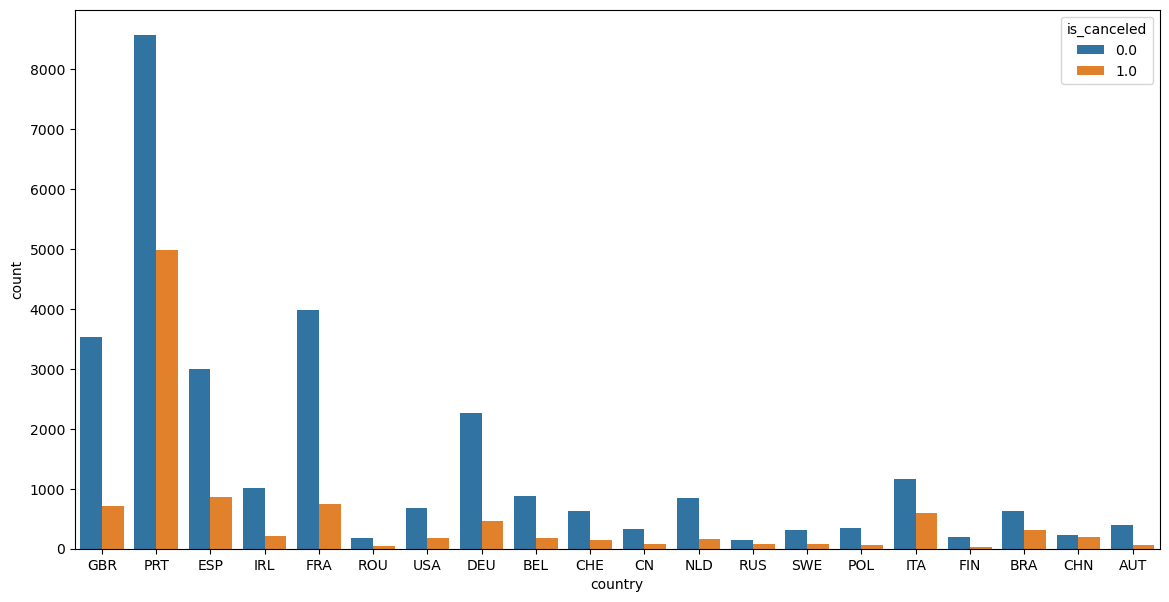

In [46]:
df_with_top_countries = train_data.where(lambda x: x['country'].isin(countries.index))[['is_canceled', 'country']]
plt.figure(figsize=(14,7))
sns.countplot(x='country', hue='is_canceled', data=df_with_top_countries)
plt.show()

In [48]:
side_of_the_world = pd.read_csv('https://www.artlebedev.ru/country-list/tab/', sep='\t')
side_of_the_world.head(10)

,name,fullname,english,alpha2,alpha3,iso,location,location-precise
0,Абхазия,Республика Абхазия,Abkhazia,AB,ABH,895,Азия,Закавказье
1,Австралия,NaN,Australia,AU,AUS,36,Океания,Австралия и Новая Зеландия
2,Австрия,Австрийская Республика,Austria,AT,AUT,40,Европа,Западная Европа
3,Азербайджан,Республика Азербайджан,Azerbaijan,AZ,AZE,31,Азия,Западная Азия
4,Албания,Республика Албания,Albania,AL,ALB,8,Европа,Южная Европа
5,Алжир,Алжирская Народная Демократическая Республика,Algeria,DZ,DZA,12,Африка,Северная Африка
6,Американское Самоа,NaN,American Samoa,AS,ASM,16,Океания,Полинезия
7,Ангилья,NaN,Anguilla,AI,AIA,660,Америка,Карибский бассейн
8,Ангола,Республика Ангола,Angola,AO,AGO,24,Африка,Центральная Африка
9,Андорра,Княжество Андорра,Andorra,AD,AND,20,Европа,Южная Европа


In [49]:
side_of_the_worlds_m = side_of_the_world[['alpha3', 'location']]
side_of_the_worlds_m = side_of_the_worlds_m.rename(columns={"alpha3": "country"})
side_of_the_worlds_m.head()

,country,location
0,ABH,Азия
1,AUS,Океания
2,AUT,Европа
3,AZE,Азия
4,ALB,Европа


In [50]:
train_data = train_data.merge(side_of_the_worlds_m, how='inner', on='country' )
test_data = test_data.merge(side_of_the_worlds_m, how='inner', on='country' )
train_data.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,...,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,season,location
0,0,7.0,0,1,1.0,0.0,0.0,0,GBR,1,...,0,0,0,0,0,0,0,1,2,Европа
1,0,14.0,0,2,2.0,0.0,0.0,0,GBR,0,...,0,0,0,0,0,0,1,2,2,Европа
2,0,7.0,0,4,2.0,0.0,0.0,0,GBR,1,...,0,6,0,0,0,0,1,4,2,Европа
3,0,12.0,0,1,2.0,0.0,0.0,0,GBR,0,...,0,0,0,0,0,0,0,1,2,Европа
4,0,92.0,4,6,2.0,0.0,0.0,0,GBR,0,...,0,3,0,0,2,0,1,10,2,Европа


In [51]:
train_data = train_data.drop('country', axis=1)
test_data = test_data.drop('country', axis=1)

In [52]:
train_data.value_counts('location')

location
Европа        38031
Америка        2101
Азия           1365
Африка          457
Океания         186
Антарктика        1
dtype: int64

In [53]:
label_encoder = LabelEncoder()

train_data['location'] = pd.Series(label_encoder.fit_transform(train_data['location']))
print(dict(enumerate(label_encoder.classes_)))

{0: 'Азия', 1: 'Америка', 2: 'Антарктика', 3: 'Африка', 4: 'Европа', 5: 'Океания'}


In [54]:
test_data['location'] = pd.Series(label_encoder.fit_transform(test_data['location']))

### Resume

- Conducted exploratory data analysis
- Removed obvious duplicates, outliers, columns with duplicate info
- Replaced categorical values with numbers
- The resulting dataframe for training has a size of (42551, 19)

## Calculate the business metric

In [55]:
combine = [train_data, test_data]

In [56]:
# add columns with the cost of the room, cleaning and seasonal coefficient in accordance with the data of the guest
for data in combine:
    data['room_cost'] = [1000 if x == 0 else \
                         (800 if x == 1 else \
                         (600 if x == 2 else \
                         (550 if x == 3 else \
                         (500 if x == 4 else \
                         (450 if x == 5 else 350))))) \
                         for x in data['reserved_room_type']]
    data['clean_cost'] = [400 if x == 0 else \
                          (350 if (x == 1) | (x == 2) else 150)
                          for x in data['reserved_room_type']]
    data['season_coef'] = [1 if x == 1 else
                               (1.4 if x == 3 else 1.2) for x in data['season']]

In [57]:
train_data.head(5)

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,distribution_channel,previous_cancellations,...,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,season,location,room_cost,clean_cost,season_coef
0,0,7.0,0,1,1.0,0.0,0.0,0,1,0,...,0,0,0,0,1,2,4,1000,400,1.2
1,0,14.0,0,2,2.0,0.0,0.0,0,0,0,...,0,0,0,1,2,2,4,1000,400,1.2
2,0,7.0,0,4,2.0,0.0,0.0,0,1,0,...,0,0,0,1,4,2,4,350,150,1.2
3,0,12.0,0,1,2.0,0.0,0.0,0,0,0,...,0,0,0,0,1,2,4,1000,400,1.2
4,0,92.0,4,6,2.0,0.0,0.0,0,0,0,...,0,2,0,1,10,2,4,550,150,1.2


In [58]:
# function to calculate profit
def revenue(is_canceled, season, nights, room, clean):

    if is_canceled == 0:
        revenue = season * (nights * room - (1 + nights) // 2 * clean)
    else:
        revenue = - (season * (room + clean))
    return revenue

In [114]:
train_data['Revenue'] = train_data.apply(lambda x: revenue(x['is_canceled'], 
                                                           x['season_coef'], 
                                                           x['total_nights'], 
                                                           x['room_cost'], 
                                                           x['clean_cost']), axis=1)

In [60]:
print('Profit = {:.0f} руб.'.format(sum(train_data['Revenue'])))

Profit = 63891100 руб.


## Model

+ Train three models: DecisionTreeClassifier, RandomForestClassifier, LogisticRegression
+ As a cross-validation, we use the GridSearchCV method
+ At the stage of data preprocessing, an imbalance of data was noted, we will solve this problem using the SMOTE () and RandomUnderSampler () methods
+ As a metric, we will use recall (Recall) to predict as many cancellations as possible.

In [61]:
X_train = train_data.drop(['is_canceled', 
                           'season_coef', 
                           'clean_cost', 
                           'room_cost', 
                           'Revenue', 
                           'total_nights'], axis=1)
y_train = train_data['is_canceled']

In [62]:
numeric = ['lead_time', 
           'stays_in_weekend_nights', 
           'stays_in_week_nights', 
           'adults', 
           'previous_cancellations', 
           'previous_bookings_not_canceled', 
           'days_in_waiting_list', 
           'total_of_special_requests', 
           'booking_changes']

scaler = StandardScaler()
scaler.fit(X_train[numeric])
X_train[numeric] = scaler.transform(X_train[numeric])

In [63]:
# cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

### DecisionTreeClassifier

In [64]:
dt_clf_pipeline = make_pipeline(SMOTE(sampling_strategy='auto', random_state=0),
                                DecisionTreeClassifier(random_state=0))

In [65]:
dt_clf_params = {'decisiontreeclassifier__max_depth': [5,7,9,11,13,15],
                 'decisiontreeclassifier__min_samples_split': [3, 5, 7]}

In [66]:
grid_dt_clf = GridSearchCV(dt_clf_pipeline,
                           param_grid=dt_clf_params,
                           cv=cv,
                           scoring='recall', 
                           return_train_score=True, 
                           n_jobs=-1)

In [67]:
grid_dt_clf.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=0),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=0)),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=0))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': [5, 7, 9, 11, 13,
                                                               15],
                         'decisiontreeclassifier__min_samples_split': [3, 5,
                                                                       7]},
             return_train_score=True, scoring='recall')

In [68]:
print(grid_dt_clf.best_score_)
print(grid_dt_clf.best_params_)

0.7598227925450657
{'decisiontreeclassifier__max_depth': 7, 'decisiontreeclassifier__min_samples_split': 7}


In [69]:
# unbalanced sample
dt_clf = DecisionTreeClassifier(random_state=0)
parameters = {'max_depth': [5,7,9,11,13,15], 
              'min_samples_split': [3, 5, 7]}
dt_grid_unbalanced = GridSearchCV(dt_clf, 
                                  parameters, 
                                  cv=cv, 
                                  scoring='recall', 
                                  return_train_score=True, 
                                  n_jobs=-1) \
                                    .fit(X_train, y_train)
dt_grid_unbalanced.best_score_

0.4274366025053469

### RandomForestClassifier

In [ ]:
# balanced sample
rf_clf_pipeline = make_pipeline(SMOTE(sampling_strategy='auto', random_state=0),
                                RandomForestClassifier(criterion='entropy', max_features='log2', random_state=0))
rf_parameters = {
    'randomforestclassifier__n_estimators': [10, 20, 30, 40, 50],
    'randomforestclassifier__max_depth' : [5,7,9,11,13,15],
    'randomforestclassifier__min_samples_split': [2, 5, 10]
}
grid_rf_clf = GridSearchCV(rf_clf_pipeline, 
                           rf_parameters, 
                           cv=cv, 
                           scoring='recall', 
                           return_train_score=True, n_jobs=-1) \
                            .fit(X_train, y_train)
grid_rf_clf.best_score_

In [70]:
rf_clf_pipeline = make_pipeline(SMOTE(sampling_strategy='auto', random_state=0),RandomForestClassifier(criterion='entropy', max_features='log2', random_state=0))

In [71]:
rf_parameters = {
    'randomforestclassifier__n_estimators': [10, 20, 30, 40, 50],
    'randomforestclassifier__max_depth' : [5,7,9,11,13,15],
    'randomforestclassifier__min_samples_split': [2, 5, 10]
}

In [72]:
grid_rf_clf = GridSearchCV(rf_clf_pipeline, 
                           rf_parameters, 
                           cv=cv, 
                           scoring='recall', 
                           return_train_score=True, 
                           n_jobs=-1)

In [73]:
grid_rf_clf.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=0),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=0)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(criterion='entropy',
                                                               max_features='log2',
                                                               random_state=0))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [5, 7, 9, 11, 13,
                                                               15],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'randomforestclassifier__n_estimators': [10, 20, 30,
                                                                  40, 50]},
             return_train_score=True, scoring='recall')

In [74]:
print(grid_rf_clf.best_score_)
print(grid_rf_clf.best_params_)

0.7049801405438436
{'randomforestclassifier__max_depth': 7, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__n_estimators': 10}


In [115]:
# unbalanced sample
rf_clf = RandomForestClassifier(criterion='entropy', max_features='log2', random_state=0)
rf_parameters = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_depth' : [5,7,9,11,13,15],
    'min_samples_split': [2, 5, 10]
}

rf_grid_unbalanced = GridSearchCV(rf_clf, 
                                  rf_parameters, 
                                  cv=cv, 
                                  scoring='recall', 
                                  return_train_score=True, 
                                  n_jobs=-1) \
                                    .fit(X_train, y_train)

0.3639474488237091

In [76]:
print(rf_grid_unbalanced.best_score_)
print(rf_grid_unbalanced.best_params_)

0.3639474488237091
{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 50}


### LogisticRegression

In [77]:
lr_clf_pipeline = make_pipeline(SMOTE(sampling_strategy='auto', random_state=0),
                                LogisticRegression(random_state=0))

lr_parameters = {
    'logisticregression__penalty': ['l1','l2'],
    'logisticregression__C': [1, 10, 100, 1000]
}

grid_lr_clf = GridSearchCV(lr_clf_pipeline, 
                           lr_parameters, 
                           cv=cv, 
                           scoring='recall', 
                           return_train_score=True, 
                           n_jobs=-1) \ 
                            .fit(X_train, y_train)


/Users/user/miniforge3/envs/boost_new/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/user/miniforge3/envs/boost_new/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

In [78]:
print(grid_lr_clf.best_score_)
print(grid_lr_clf.best_params_)

0.7190345249007029
{'logisticregression__C': 1000, 'logisticregression__penalty': 'l2'}


In [79]:
lr_clf_unbalaced = LogisticRegression(random_state=0)

lr_parameters_unbalanced = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100, 1000]
}


grid_lr_clf_unbalanced = GridSearchCV(lr_clf_unbalaced, 
                                      lr_parameters_unbalanced, 
                                      cv=cv, 
                                      scoring='recall', 
                                      return_train_score=True, 
                                      n_jobs=-1) \ 
                                        .fit(X_train, y_train)

/Users/user/miniforge3/envs/boost_new/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/user/miniforge3/envs/boost_new/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/Users/user/miniforge3/envs/boost_new/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/user/miniforge3/envs/boost_new/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/Users/user/miniforge3/envs/boost_new/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/user/miniforge3/envs/boost_new/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

In [80]:
print(grid_lr_clf_unbalanced.best_score_)
print(grid_lr_clf_unbalanced.best_params_)

0.21527650473571647
{'C': 100, 'penalty': 'l2'}


**Best Model** - DesicionTreeClassifier с 'max_depth': 7, min_samples_split': 7

## Test

In [81]:
best_clf = grid_dt_clf.best_estimator_

In [82]:
X_test = test_data.drop(['is_canceled', 'season_coef', 'clean_cost', 'room_cost', 'total_nights'], axis=1)
y_test = test_data['is_canceled']
X_test[numeric] = scaler.transform(X_test[numeric])

In [83]:
predictions = best_clf.predict(X_test)
print("recall:", recall_score(predictions, y_test))
print("accuracy:", accuracy_score(predictions, y_test))

recall: 0.4486574106702375
accuracy: 0.6195374900681637


In [84]:
test_data['Predict_cancelation'] = predictions

In [85]:
test_data['Revenue_true'] = test_data.apply(lambda x: revenue(x['is_canceled'], 
                                                              x['season_coef'], 
                                                              x['total_nights'], 
                                                              x['room_cost'], 
                                                              x['clean_cost']), axis=1)

In [86]:
def revenue_model(is_canceled, predict, revenue):

    if is_canceled == 1 and predict == 1:
        revenue_predict = revenue * 0.2
    else:
        revenue_predict = revenue
 
    return revenue_predict

In [87]:
test_data['Revenue_predict'] = test_data.apply(lambda x: revenue_model(x['is_canceled'], 
                                                                       x['Predict_cancelation'], 
                                                                       x['Revenue_true']), axis=1)

In [88]:
print('Predicted revenur = {:.0f} руб.'.format(sum(test_data['Revenue_predict'])- 400000))
print('Profit without model= {:.0f} руб.'.format(sum(test_data['Revenue_true'])))

Predicted revenur = 34247092 руб.
Profit without model= 28112380 руб.


## Unreliable client

Highlight the properties that affect the model the most.

<AxesSubplot: >

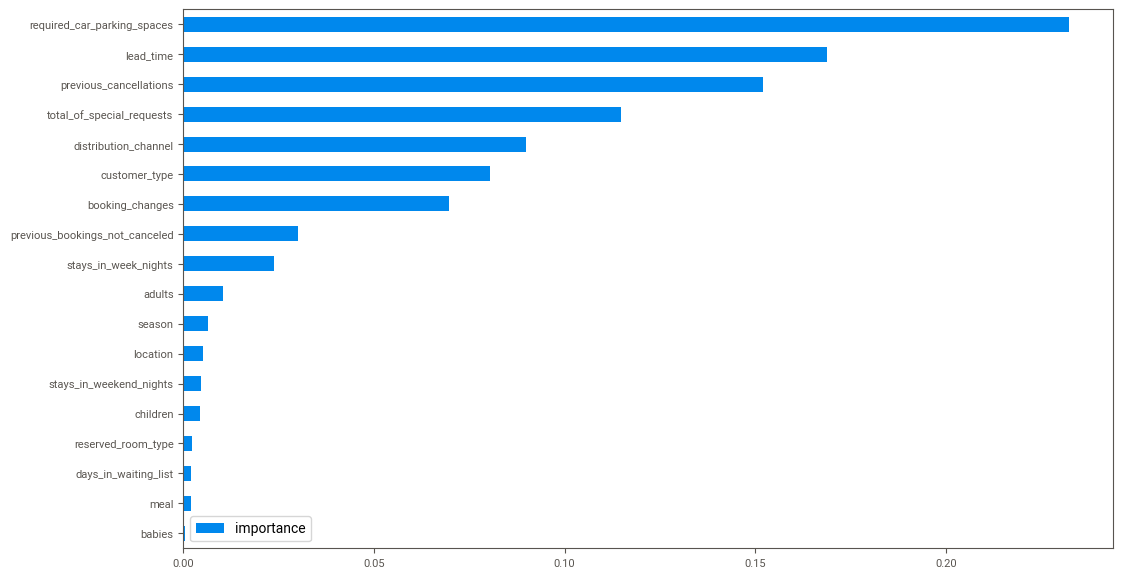

In [116]:
feature_importance_rfc = pd.DataFrame(grid_rf_clf.best_estimator_._final_estimator.feature_importances_,
                                      index=X_train.columns, 
                                      columns=['importance'])
feature_importance_rfc.sort_values('importance').plot(kind='barh', figsize=(12, 7))

Take the first 4 to describe the "unreliable" client.

In [101]:
train_data[['lead_time', 'is_canceled']] \
    .groupby(['lead_time'], as_index=False) \
    .mean() \
    .sort_values(by='is_canceled', ascending=False)

,lead_time,is_canceled
368,374.0,1.0
344,344.0,1.0
366,372.0,1.0
365,367.0,1.0
360,361.0,1.0
...,...,...
352,352.0,0.0
361,362.0,0.0
340,340.0,0.0
306,306.0,0.0


In [102]:
train_data[['previous_cancellations', 'is_canceled']] \
    .groupby(['previous_cancellations'], as_index=False) \
    .mean() \
    .sort_values(by='is_canceled', ascending=False)

,previous_cancellations,is_canceled
1,1,0.880536
3,3,0.625000
2,2,0.558824
4,4,0.500000
5,5,0.500000
0,0,0.243798


In [92]:
train_data[['total_of_special_requests', 'is_canceled']] \
    .groupby(['total_of_special_requests'], as_index=False) \
    .mean() \
    .sort_values(by='is_canceled', ascending=False)

,total_of_special_requests,is_canceled
0,0,0.329172
3,3,0.191766
1,1,0.188441
2,2,0.184280
4,4,0.112245
5,5,0.000000


In [93]:
train_data[['customer_type', 'is_canceled']] \
    .groupby(['customer_type'], as_index=False) \
    .mean() \
    .sort_values(by='is_canceled', ascending=False)

,customer_type,is_canceled
0,0,0.279407
2,2,0.197312
1,1,0.170756
3,3,0.074803


In [94]:
train_data[['required_car_parking_spaces', 'is_canceled']] \
    .groupby(['required_car_parking_spaces'], as_index=False) \
    .mean() \
    .sort_values(by='is_canceled', ascending=False)

,required_car_parking_spaces,is_canceled
0,0,0.282291
1,1,0.000000
2,2,0.000000
3,3,0.000000


**Unwanted customer:**
- book a hotel well in advance
- already canceled the booking more than once
- leaves no special requests
- travels alone or for work
- traveling without a car

## Conclusions

1. Conducted an exploratory data analysis, checked for missing values, duplicates.


2. Pre-processed data: removed unnecessary columns, brought categorical properties from string to numeric types


3. We estimated the profit of the training dataset - 141135098 rubles.


4. Trained several models to predict cancellations. The best model is DesicionTree, with a recall metric value of 0.74
5. Calculate profits based on the model's prediction, taking into account the deposit, and compare with real data with the calculation of profits in the usual way. The use of deposits can significantly reduce costs. And even taking into account the cost of the model, the hotel still wins.
6. Defined trigger properties for a guest canceling a booking.